In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('../../cece_data/df2015_16.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', "_")
df.head()

,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,total_votes,target,state,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,610764.0,0,CA,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,16489.0,1,CA,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,86711.0,1,CA,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,21455.0,1,CA,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,6212.0,1,CA,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756


In [4]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [5]:
df.iloc[0, 29:44]

ed_no_schooling_completed    25753
ed_nursery_school              148
ed_kindergarten                253
ed_1st_grade                   768
ed_2nd_grade                  1936
ed_3rd_grade                  4217
ed_4th_grade                  3130
ed_5th_grade                  4937
ed_6th_grade                 21621
ed_7th_grade                  4847
ed_8th_grade                 10795
ed_9th_grade                 14180
e_10th_grade                 12027
ed_11th_grade                14729
ed_12th_grade_no_diploma     23248
Name: 0, dtype: object

In [6]:
row_sums = []
for row in df.index:
    row_sums.append(df.iloc[row, 29:44].sum())

In [7]:
df['sums'] = row_sums

In [8]:
df['percent_no_hs'] = df['sums']/df['ed_total']

In [9]:
df.head()

,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,state,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude,sums,percent_no_hs
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,CA,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330,142589,0.130553
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,CA,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385,3337,0.116369
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,CA,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191,17192,0.120145
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,CA,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511,2812,0.083569
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,CA,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756,4231,0.318216


In [10]:
df['percent_no_hs']

0      0.130553
1      0.116369
2      0.120145
3      0.083569
4      0.318216
         ...   
474    0.192152
475    0.163808
476    0.212963
477    0.141601
478    0.467203
Name: percent_no_hs, Length: 479, dtype: float64

In [11]:
df.head()


,fips,vax_percentage,total_agriculture,total_construction,total_manufacturing,total_wholesale_trade,total_retail_trade,transportation_warehousing_utilities,total_information,total_finance_and_real_estate,...,state,county_[2],population(2010),land_areami²,water_areami²,total_areami²,latitude,longitude,sums,percent_no_hs
0,6001,0.962155,3308,39861,80961,20969,75187,39042,24187,47611,...,CA,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330,142589,0.130553
1,6005,0.870878,195,820,568,165,1884,525,188,523,...,CA,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385,3337,0.116369
2,6007,0.902701,3249,4682,5355,1625,12125,2596,1620,4508,...,CA,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191,17192,0.120145
3,6009,0.884900,496,1662,1326,373,1819,922,201,661,...,CA,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511,2812,0.083569
4,6011,0.997456,2425,356,958,164,620,463,45,375,...,CA,Colusa,21419,1150.731,5.630,1156.361,39.17773,-122.23756,4231,0.318216


In [12]:
 25753+148+253+768+1936+4217+3130+4937+21621+4847+10795+14180+12027+14729+23248

142589

In [13]:
df.iloc[0,:].to_list()

[6001,
 0.9621547064881564,
 3308,
 39861,
 80961,
 20969,
 75187,
 39042,
 24187,
 47611,
 133336,
 174656,
 70809,
 40358,
 27847,
 362591,
 126123,
 167052,
 50316,
 72050,
 1487408,
 708558,
 184883,
 9813,
 439055,
 13760,
 131339,
 37.1,
 1092189,
 25753,
 148,
 253,
 768,
 1936,
 4217,
 3130,
 4937,
 21621,
 4847,
 10795,
 14180,
 12027,
 14729,
 23248,
 34052.0,
 70100,
 848232,
 13753,
 68307,
 73763,
 1573351,
 2911,
 1584983,
 2016,
 'PRESIDENT',
 'CA',
 514842.0,
 95922.0,
 610764.0,
 0,
 'CA',
 'Alameda',
 1510271,
 739.0169999999998,
 82.311,
 821.328,
 37.64808,
 -121.9133,
 142589,
 0.13055341154324024]

In [14]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [15]:
#df = df.drop(['ed_total', 'ed_no_schooling_completed', 'ed_nursery_school','ed_kindergarten', 'ed_1st_grade', 'ed_2nd_grade', 'ed_3rd_grade','ed_4th_grade', 'ed_5th_grade', 
#'ed_6th_grade', 'ed_7th_grade','ed_8th_grade', 'ed_9th_grade', 'e_10th_grade', 'ed_11th_grade',
#'ed_12th_grade_no_diploma', 'sums', 'fips'], axis=1)

In [16]:
df['pop_density'] = df['population(2010)']/df['total_areami²']

In [17]:
df = df.drop(['office','state','dem_votes','rep_votes', 'year','latitude','longitude'], axis=1)

In [18]:
#'ed_nursery_school, 
#'ed_kindergarten,
#'ed_1st_grade, 
#'ed_2nd_grade,
#'ed_3rd_grade,
#'ed_4th_grade, 
#'ed_5th_grade,
#'ed_6th_grade, 
#'ed_7th_grade,
#'ed_8th_grade, 
#'ed_9th_grade,  
#'e_10th_grade, 
#'ed_11th_grade, 
#'ed_12th_grade_no_diploma, 

In [19]:
df['unemp_rate'] = df['unemployed_pop_16_years_and_over']/df['in_civilian_labor_force']

In [63]:
df.iloc[0, 47:51]

Series([], Name: 0, dtype: float64)

In [20]:
insurance_sums = []
for row in df.index:
    insurance_sums.append(df.iloc[row, 47:51].sum())

In [21]:
df['insurance_sums'] = insurance_sums

In [22]:
df['uninsured_rate'] = df['insurance_sums']/df['health_insurance_total']

In [23]:
#population_of_one_race_total', 'white', 'black_or_african_american',
      # 'american_indian_and_alaska_native', 'asian_alone',
       #'native_hawaiian_and_other_pacific_islander',

In [24]:
df['percent_white'] = df['white']/df['population_of_one_race_total']

In [25]:
df['percent_black'] = df['black_or_african_american']/df['population_of_one_race_total']

In [26]:
df['percent_american_indian_and_alaska_native'] = df['american_indian_and_alaska_native']/df['population_of_one_race_total']

In [27]:
df['percent_pacific_islander'] = df['native_hawaiian_and_other_pacific_islander']/df['population_of_one_race_total']

In [28]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [29]:
df = df.drop(['unemployed_pop_16_years_and_over','ed_total', 'ed_no_schooling_completed', 'ed_nursery_school','ed_kindergarten', 'ed_1st_grade', 
'ed_2nd_grade', 'ed_3rd_grade','ed_4th_grade', 'ed_5th_grade'],axis=1)


In [30]:
df = df.drop(['ed_6th_grade', 'ed_7th_grade','ed_8th_grade', 'ed_9th_grade', 'e_10th_grade', 'ed_11th_grade'],axis=1)

In [31]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'population_of_one_race_total', 'white', 'black_or_african_american',
       'american_indian_and_alaska_native', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander',
       'population_of_one_race_some_oth

In [32]:
df = df.drop(['population_of_one_race_total', 'white', 'black_or_african_american',
'american_indian_and_alaska_native', 'asian_alone','native_hawaiian_and_other_pacific_islander',
'population_of_one_race_some_other_race'], axis=1)

In [33]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'ed_12th_grade_no_diploma', 'median_income',
       'in_civilian_labor_force', 'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_

In [34]:
#df = df.drop(['fips'], axis=1)

In [35]:
df = df.drop(['ed_12th_grade_no_diploma','sums', 'insurance_sums'], axis=1)

In [36]:
df =df.drop(['insurance_sums'],axis=1)

In [37]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income', 'in_civilian_labor_force',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 

In [38]:
#df = df.drop(['dem_votes', 'rep_votes'], axis=1)

In [39]:
#df = pd.read_csv('../../cece_data/df116features.csv')

In [40]:
#df1516.columns

In [41]:
#df.to_csv('../../cece_data/df1920features.csv')

In [42]:
df.target

0      0
1      1
2      1
3      1
4      1
      ..
474    1
475    1
476    1
477    1
478    0
Name: target, Length: 479, dtype: int64

<AxesSubplot:>

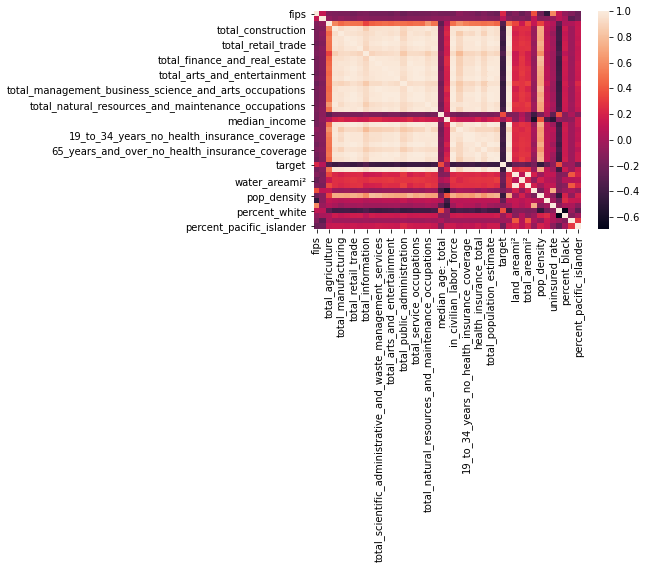

In [43]:
sns.heatmap(df.corr())

In [44]:
# Increase the size of the heatmap.
#plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
#heatmap = sns.heatmap(dfbest.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [45]:
feature_list = df.columns

In [46]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income', 'in_civilian_labor_force',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 

In [47]:
#dfbest= df[['vax_percentage', 'total_agriculture', 'total_construction',
       #'total_manufacturing',
       #'total_service_occupations', 'total_sales_and_office_occupations',
       #'total_natural_resources_and_maintenance_occupations',
      # 'total_production,_transportation,_and_material_moving_occupations',
      # 'population_of_one_race_total','median_income',
      # 'unemployed_pop_16_years_and_over', 'in_civilian_labor_force',
      # 'under_19_no_health_insurance_coverage',
      # '19_to_34_years_no_health_insurance_coverage',
      # '35_to_64_years_no_health_insurance_coverage', 'health_insurance_total',
      # '65_years_and_over_no_health_insurance_coverage',
     #  'total_population_estimate',
   #  'total_votes', 'target',
   #    'population(2010)', 'land_areami²', 'water_areami²', 'total_areami²',
    #   'latitude', 'longitude' ]]

In [48]:
# Increase the size of the heatmap.
#plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
#heatmap = sns.heatmap(dfbest.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [49]:
df.columns

Index(['fips', 'vax_percentage', 'total_agriculture', 'total_construction',
       'total_manufacturing', 'total_wholesale_trade', 'total_retail_trade',
       'transportation_warehousing_utilities', 'total_information',
       'total_finance_and_real_estate',
       'total_scientific_administrative_and_waste_management_services',
       'total_educational_healthcare_and_social_assistance',
       'total_arts_and_entertainment', 'total_other_services',
       'total_public_administration',
       'total_management_business_science_and_arts_occupations',
       'total_service_occupations', 'total_sales_and_office_occupations',
       'total_natural_resources_and_maintenance_occupations',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income', 'in_civilian_labor_force',
       'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 

In [50]:
df.iloc[row,1:19]

vax_percentage                                                   0.9963
total_agriculture                                                  1006
total_construction                                                  463
total_manufacturing                                                  97
total_wholesale_trade                                                 0
total_retail_trade                                                  433
transportation_warehousing_utilities                                353
total_information                                                    90
total_finance_and_real_estate                                       193
total_scientific_administrative_and_waste_management_services       140
total_educational_healthcare_and_social_assistance                 1173
total_arts_and_entertainment                                        258
total_other_services                                                578
total_public_administration                                     

In [51]:
columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for x in columns:
    df[f"{df.columns[x]}_percentage"] = df.iloc[:, x]/df['in_civilian_labor_force']
df = df.drop(df.iloc[:, 1:19], axis=1)


In [52]:
df.iloc[:, 16:].columns = df.iloc[:, 16:].columns.str.replace('total_', '')

In [53]:
df.rename(columns = dict(zip(df.iloc[:, 16:].columns, df.iloc[:, 16:].columns.str.replace('total_', ''))),inplace=True)
          
          
          
          
          

In [54]:
df = df.drop(['in_civilian_labor_force', 'under_19_no_health_insurance_coverage',
       '19_to_34_years_no_health_insurance_coverage',
       '35_to_64_years_no_health_insurance_coverage', 'health_insurance_total',
       '65_years_and_over_no_health_insurance_coverage',
       'total_population_estimate', 'total_votes', 'county_[2]', 'population(2010)'], axis=1)

In [55]:
df.columns

Index(['fips',
       'total_production,_transportation,_and_material_moving_occupations',
       'median_age:_total', 'median_income', 'target', 'land_areami²',
       'water_areami²', 'areami²', 'percent_no_hs', 'pop_density',
       'unemp_rate', 'uninsured_rate', 'percent_white', 'percent_black',
       'percent_american_indian_and_alaska_native', 'percent_pacific_islander',
       'vax_percentage_percentage', 'agriculture_percentage',
       'construction_percentage', 'manufacturing_percentage',
       'wholesale_trade_percentage', 'retail_trade_percentage',
       'transportation_warehousing_utilities_percentage',
       'information_percentage', 'finance_and_real_estate_percentage',
       'scientific_administrative_and_waste_management_services_percentage',
       'educational_healthcare_and_social_assistance_percentage',
       'arts_and_entertainment_percentage', 'other_services_percentage',
       'public_administration_percentage',
       'management_business_science_and_ar

In [56]:
df.to_csv('../../cece_data/df1516final.csv')

In [57]:
dfnum = df.select_dtypes(exclude=['object'])

In [58]:
#'ed_nursery_school','ed_kindergarten','ed_1st_grade','ed_2nd_grade','ed_3rd_grade','ed_4th_grade','ed_5th_grade'        

In [59]:
X = dfnum.drop('target', axis=1)
y = df['target']

In [60]:
#first train-test-split
X_t, X_test, y_t, y_test = train_test_split(X,y, random_state=42)

In [61]:
#second train-test-split for cross val
X_train, X_val, y_train, y_val = train_test_split(X_t,y_t, random_state=42)

In [62]:
#Handling missing cece_data using 
imputer = SimpleImputer()

In [63]:
#fitting on training cece_data
imputer.fit(X_train)
#transform training and validation cece_data
X_train_imputed = imputer.transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [64]:
#turned imputed cece_data into cece_dataframes
X_train_imputed_df = pd.cece_dataFrame(X_train_imputed, columns=X_train.columns)
X_val_imputed_df = pd.cece_dataFrame(X_val_imputed, columns=X_val.columns)

In [65]:
#scaling cece_data
scaler = StandardScaler()

In [66]:
scaler.fit(X_train_imputed_df)

StandardScaler()

In [67]:
#transform train and validation cece_data 
X_train_scaled = scaler.transform(X_train_imputed_df)
X_val_scaled = scaler.transform(X_val_imputed_df)

In [68]:
#create cece_dataframes of scaled train and val cece_data
X_train_scaled_df = pd.cece_dataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.cece_dataFrame(X_val_scaled, columns=X_val.columns)

In [69]:
#sanity check
X_train_scaled_df.head()

,fips,"total_production,_transportation,_and_material_moving_occupations",median_age:_total,median_income,land_areami²,water_areami²,areami²,percent_no_hs,pop_density,unemp_rate,...,finance_and_real_estate_percentage,scientific_administrative_and_waste_management_services_percentage,educational_healthcare_and_social_assistance_percentage,arts_and_entertainment_percentage,other_services_percentage,public_administration_percentage,management_business_science_and_arts_occupations_percentage,service_occupations_percentage,sales_and_office_occupations_percentage,natural_resources_and_maintenance_occupations_percentage
0,-0.817409,-0.224287,0.419439,0.517491,-0.172413,-0.312044,-0.213972,-0.970689,-0.279042,0.562727,...,0.224102,-0.093378,-0.017318,0.085038,-0.418477,-0.303133,0.038583,-1.068640,0.418680,-0.457461
1,-0.821644,-0.282621,-0.319016,0.981544,-0.489615,-0.332271,-0.527792,-0.209116,-0.294928,-0.614744,...,-0.321866,-0.837061,-0.606046,-0.284785,-0.704073,-0.578173,-0.533807,-0.916435,0.868113,-0.398812
2,-0.815960,0.007552,-0.576617,0.723429,-0.345640,-0.279923,-0.379130,-1.012646,0.254730,0.244515,...,0.167226,0.842131,0.929825,0.129815,-0.123675,-0.734422,1.197210,-0.221978,0.529541,-1.328088
3,0.928525,-0.115103,-1.074644,-0.200521,0.296071,-0.245207,0.254846,-0.112446,-0.242456,-1.074321,...,0.012943,0.455648,0.830617,0.215584,0.379057,0.209350,0.305562,0.266881,0.532705,-0.093297
4,-1.436237,-0.311971,-1.057471,0.130550,0.032182,-0.307762,-0.012822,1.831635,-0.360050,0.812424,...,-0.385360,-0.841425,-2.030072,1.326996,-2.167545,-0.238316,-0.980882,-0.693948,-1.562606,2.301394


In [70]:
#sanity check again
X_val_scaled_df.head()

,fips,"total_production,_transportation,_and_material_moving_occupations",median_age:_total,median_income,land_areami²,water_areami²,areami²,percent_no_hs,pop_density,unemp_rate,...,finance_and_real_estate_percentage,scientific_administrative_and_waste_management_services_percentage,educational_healthcare_and_social_assistance_percentage,arts_and_entertainment_percentage,other_services_percentage,public_administration_percentage,management_business_science_and_arts_occupations_percentage,service_occupations_percentage,sales_and_office_occupations_percentage,natural_resources_and_maintenance_occupations_percentage
0,-0.818189,-0.244803,0.350745,0.326099,-0.270515,-0.315365,-0.310605,-0.729057,-0.291511,-0.145157,...,0.026692,-0.354992,0.653020,0.210836,-1.263158,-0.414115,-0.134329,0.312817,-0.063483,-1.056377
1,-0.819081,-0.338729,0.522479,-0.738914,-0.541328,-0.311054,-0.575420,-0.228831,-0.321146,0.785450,...,0.224857,-0.700407,2.066929,0.324187,-1.697280,0.548186,-0.073137,0.482709,0.179442,-0.340778
2,0.927745,-0.337232,-0.696830,-1.179649,-0.153041,-0.284070,-0.190952,0.531043,-0.381789,-0.507884,...,-0.754946,-1.329578,-0.745020,-0.092453,1.735812,-0.428038,-0.370663,-0.336231,-0.359333,0.212398
3,-1.098907,-0.344168,0.883120,0.255221,-0.360649,-0.149186,-0.374994,0.314196,-0.349700,0.505025,...,0.381651,1.087092,0.217045,-0.412562,-0.266923,3.297784,1.611250,-0.133951,-0.071275,-0.744167
4,-0.821978,-0.317118,0.247705,0.022964,-0.539828,-0.330241,-0.576716,-0.763266,-0.330520,-0.185244,...,-0.389887,-0.742834,0.115537,-0.614988,-1.219126,-1.026114,-0.191570,-0.816907,-0.641377,-0.202997


In [71]:
#create a function to build the various models needed in the remainder of this notebook

def modeling_function(model, X_train, y_train, X_val, y_val):
    #fit model to training cece_data
    model.fit(X_train_scaled_df, y_train)
    
    #make predictions on train and validation
    train_preds = model.predict(X_train_scaled_df)
    val_preds = model.predict(X_val_scaled_df)
    
    #output metrics
    print(model, ': Training Recall', recall_score(y_train, train_preds))
    print(model, ': Validation Recall', recall_score(y_val, val_preds))
    print('Training Accuracy', accuracy_score(y_train, train_preds))
    print('Validation Accuracy', accuracy_score(y_val, val_preds))
    print('Training Precicion', precision_score(y_train, train_preds))
    print('Validation Precision', precision_score(y_val, val_preds))
    print('Training F1', f1_score(y_train, train_preds))
    print('Validation F1', f1_score(y_val, val_preds))
    
    #return fitted model
    return model

In [72]:
#instantiate log reg
logreg = LogisticRegression(solver ='liblinear')

In [73]:
#run logreg through function to fit and model
logreg_fitted = modeling_function(logreg, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

LogisticRegression(solver='liblinear') : Training Recall 0.9824561403508771
LogisticRegression(solver='liblinear') : Validation Recall 0.9615384615384616
Training Accuracy 0.9628252788104089
Validation Accuracy 0.9222222222222223
Training Precicion 0.9739130434782609
Validation Precision 0.9493670886075949
Training F1 0.9781659388646288
Validation F1 0.9554140127388535


In [74]:
logreg_coefs = pd.cece_dataFrame(np.abs(logreg.coef_.T), columns=['coefficient'], index=X_train_scaled_df.columns)
logreg_coefs.sort_values(by='coefficient')

,coefficient
median_income,0.000862
percent_pacific_islander,0.023639
water_areami²,0.080464
arts_and_entertainment_percentage,0.082369
agriculture_percentage,0.092306
percent_american_indian_and_alaska_native,0.125266
other_services_percentage,0.253681
pop_density,0.332689
uninsured_rate,0.335526
transportation_warehousing_utilities_percentage,0.339960


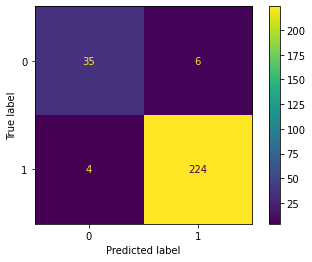

In [75]:
plot_confusion_matrix(logreg_fitted, X_train_scaled_df, y_train)

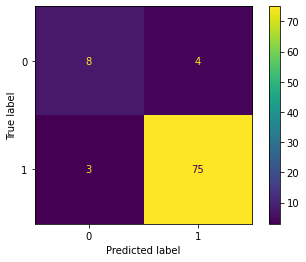

In [76]:
plot_confusion_matrix(logreg_fitted, X_val_scaled_df, y_val)

In [77]:
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=.5)

In [78]:
logreg2_fitted = modeling_function(logreg2, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear') : Training Recall 0.9824561403508771
LogisticRegression(C=0.5, penalty='l1', solver='liblinear') : Validation Recall 0.9615384615384616
Training Accuracy 0.9405204460966543
Validation Accuracy 0.9222222222222223
Training Precicion 0.9491525423728814
Validation Precision 0.9493670886075949
Training F1 0.9655172413793103
Validation F1 0.9554140127388535


In [79]:
logreg2_coefs = pd.cece_dataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train_scaled_df.columns)
logreg2_coefs.sort_values(by='coefficient')

,coefficient
agriculture_percentage,0.000000
sales_and_office_occupations_percentage,0.000000
vax_percentage_percentage,0.000000
percent_pacific_islander,0.000000
percent_american_indian_and_alaska_native,0.000000
uninsured_rate,0.000000
manufacturing_percentage,0.000000
transportation_warehousing_utilities_percentage,0.000000
other_services_percentage,0.000000
water_areami²,0.000000


In [80]:
dtc = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [82]:
rfc_fitted = modeling_function(rfc, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

RandomForestClassifier() : Training Recall 1.0
RandomForestClassifier() : Validation Recall 0.9615384615384616
Training Accuracy 1.0
Validation Accuracy 0.8888888888888888
Training Precicion 1.0
Validation Precision 0.9146341463414634
Training F1 1.0
Validation F1 0.9375000000000001


In [83]:
dtc_fitted = modeling_function(dtc, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2) : Training Recall 0.9912280701754386
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2) : Validation Recall 0.9743589743589743
Training Accuracy 0.9070631970260223
Validation Accuracy 0.8888888888888888
Training Precicion 0.9076305220883534
Validation Precision 0.9047619047619048
Training F1 0.9475890985324946
Validation F1 0.9382716049382716


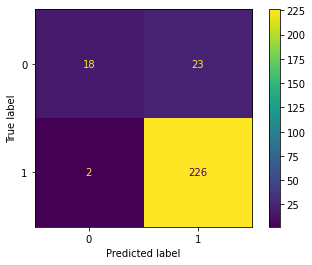

In [84]:
plot_confusion_matrix(dtc_fitted, X_train_scaled_df, y_train)

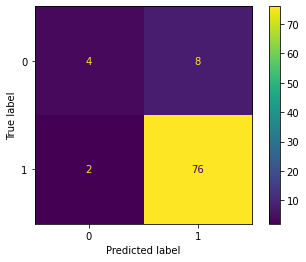

In [85]:
plot_confusion_matrix(dtc_fitted, X_val_scaled_df, y_val)

In [86]:
#create param_grid dictionary
param_grid = {'criterion': ['gini','entropy'],
                'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
                'max_depth': [2,3,4,5,6,7,8,9,10]}

In [87]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='recall')

In [88]:
dtc_gs.fit(X_train_scaled_df, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14]},
             scoring='recall')

In [89]:
best_model = dtc_gs.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [90]:
X_test_imputed = imputer.transform(X_test)

In [91]:
X_test_scaled = scaler.transform(X_test_imputed)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()

In [94]:
fitted_knn = modeling_function(knn, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

KNeighborsClassifier() : Training Recall 0.9956140350877193
KNeighborsClassifier() : Validation Recall 0.9743589743589743
Training Accuracy 0.9442379182156134
Validation Accuracy 0.9444444444444444
Training Precicion 0.941908713692946
Validation Precision 0.9620253164556962
Training F1 0.9680170575692963
Validation F1 0.9681528662420382


In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
scaled_pipeline_1 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])

In [97]:
scaled_pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [98]:
scaled_pipeline_1.score(X_val, y_val)

0.9444444444444444

In [99]:
scaled_pipeline_1.score(X_test, y_test)

0.8583333333333333

In [100]:
scaled_pipeline_2 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('logreg', LogisticRegression())])

In [101]:
scaled_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('logreg', LogisticRegression())])

In [102]:
scaled_pipeline_2.score(X_val, y_val)

0.9222222222222223

In [103]:
scaled_pipeline_1.score(X_test, y_test)

0.8583333333333333

In [104]:
scaled_pipeline_3 = Pipeline([('si', SimpleImputer()),
                              ('ss', StandardScaler()), 
                              ('dtc', DecisionTreeClassifier())])

In [105]:
scaled_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('dtc', DecisionTreeClassifier())])

In [106]:
scaled_pipeline_3.score(X_val, y_val)

0.9

In [107]:
scaled_pipeline_3.score(X_test, y_test)

0.8833333333333333

In [108]:
feature_list = X_train_scaled_df.columns

In [109]:
from sklearn.feature_selection import RFE
scores = []
for num in range(1, X_train_scaled.shape[1]):
    selector = RFE(logreg, n_features_to_select=num, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    score = selector.score(X_val_scaled, y_val)
    scores.append(score)
    selector = RFE(logreg, n_features_to_select=1, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    score = selector.score(X_val_scaled, y_val)
    feature_importance = dict(zip(feature_list,selector.ranking_))

In [110]:
feature_importance

{'fips': 7,
 'total_production,_transportation,_and_material_moving_occupations': 1,
 'median_age:_total': 8,
 'median_income': 33,
 'land_areami²': 26,
 'water_areami²': 31,
 'areami²': 4,
 'percent_no_hs': 3,
 'pop_density': 25,
 'unemp_rate': 16,
 'uninsured_rate': 21,
 'percent_white': 15,
 'percent_black': 14,
 'percent_american_indian_and_alaska_native': 28,
 'percent_pacific_islander': 32,
 'vax_percentage_percentage': 17,
 'agriculture_percentage': 30,
 'construction_percentage': 18,
 'manufacturing_percentage': 22,
 'wholesale_trade_percentage': 13,
 'retail_trade_percentage': 6,
 'transportation_warehousing_utilities_percentage': 23,
 'information_percentage': 20,
 'finance_and_real_estate_percentage': 11,
 'scientific_administrative_and_waste_management_services_percentage': 19,
 'educational_healthcare_and_social_assistance_percentage': 24,
 'arts_and_entertainment_percentage': 29,
 'other_services_percentage': 27,
 'public_administration_percentage': 5,
 'management_busine

In [111]:
dtc_best_model = dtc_gs.best_estimator_
dtc_best_model

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.cece_datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled, y_train)
print (CV_rfc.best_params_)

KeyboardInterrupt: 

In [ ]:
rfcbest = RandomForestClassifier(max_features= 'auto', n_estimators=200)

In [ ]:
 rfc_fitted = modeling_function(logreg, X_train_scaled_df, y_train, X_val_scaled_df, y_val)

In [ ]:
df.columns

In [ ]:
df['median_age:_total'].value_counts()

,fips,"total_production,_transportation,_and_material_moving_occupations",median_age:_total,median_income,target,land_areami²,water_areami²,areami²,percent_no_hs,pop_density,...,finance_and_real_estate_percentage,scientific_administrative_and_waste_management_services_percentage,educational_healthcare_and_social_assistance_percentage,arts_and_entertainment_percentage,other_services_percentage,public_administration_percentage,management_business_science_and_arts_occupations_percentage,service_occupations_percentage,sales_and_office_occupations_percentage,natural_resources_and_maintenance_occupations_percentage
0,6001,72050,37.1,34052.0,0,739.017,82.311,821.328,0.130553,1838.815918,...,0.056130,0.157193,0.205906,0.083478,0.047579,0.032829,0.427467,0.148689,0.196941,0.059319
1,6005,1334,50.0,26246.0,1,594.583,11.373,605.956,0.116369,62.861000,...,0.035770,0.079201,0.167157,0.131728,0.044935,0.103960,0.265509,0.197045,0.217495,0.088640
2,6007,8350,36.8,20668.0,1,1636.464,40.667,1677.131,0.120145,131.176396,...,0.044337,0.086000,0.254694,0.102287,0.046442,0.038249,0.303890,0.204996,0.208134,0.080236
3,6009,1924,50.7,26527.0,1,1020.012,16.915,1036.927,0.083569,43.954878,...,0.035778,0.092720,0.194371,0.074371,0.049039,0.065169,0.317618,0.166604,0.182355,0.108742
4,6011,1222,34.0,24889.0,1,1150.731,5.630,1156.361,0.318216,18.522762,...,0.038032,0.040974,0.122921,0.117647,0.019980,0.046450,0.221501,0.152434,0.161359,0.237018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,48443,44,46.1,21209.0,1,2358.026,0.041,2358.067,0.192152,0.417291,...,0.058005,0.095128,0.088167,0.032483,0.088167,0.248260,0.192575,0.294664,0.229698,0.143852
475,48359,80,32.4,21943.0,1,1500.533,0.903,1501.436,0.163808,1.366692,...,0.045509,0.033533,0.299401,0.086228,0.038323,0.064671,0.362874,0.178443,0.182036,0.106587
476,48087,181,37.0,21242.0,1,918.441,0.880,919.321,0.212963,3.325280,...,0.035941,0.038760,0.194503,0.066244,0.026075,0.075405,0.240310,0.147287,0.176180,0.256519
477,48447,93,49.6,22927.0,1,912.552,2.929,915.481,0.141601,1.792500,...,0.059659,0.025568,0.218750,0.018466,0.046875,0.034091,0.296875,0.166193,0.225852,0.153409


In [57]:
df2016 = df

In [58]:
df2016

,fips,"total_production,_transportation,_and_material_moving_occupations",median_age:_total,median_income,target,land_areami²,water_areami²,areami²,percent_no_hs,pop_density,...,finance_and_real_estate_percentage,scientific_administrative_and_waste_management_services_percentage,educational_healthcare_and_social_assistance_percentage,arts_and_entertainment_percentage,other_services_percentage,public_administration_percentage,management_business_science_and_arts_occupations_percentage,service_occupations_percentage,sales_and_office_occupations_percentage,natural_resources_and_maintenance_occupations_percentage
0,6001,72050,37.1,34052.0,0,739.017,82.311,821.328,0.130553,1838.815918,...,0.056130,0.157193,0.205906,0.083478,0.047579,0.032829,0.427467,0.148689,0.196941,0.059319
1,6005,1334,50.0,26246.0,1,594.583,11.373,605.956,0.116369,62.861000,...,0.035770,0.079201,0.167157,0.131728,0.044935,0.103960,0.265509,0.197045,0.217495,0.088640
2,6007,8350,36.8,20668.0,1,1636.464,40.667,1677.131,0.120145,131.176396,...,0.044337,0.086000,0.254694,0.102287,0.046442,0.038249,0.303890,0.204996,0.208134,0.080236
3,6009,1924,50.7,26527.0,1,1020.012,16.915,1036.927,0.083569,43.954878,...,0.035778,0.092720,0.194371,0.074371,0.049039,0.065169,0.317618,0.166604,0.182355,0.108742
4,6011,1222,34.0,24889.0,1,1150.731,5.630,1156.361,0.318216,18.522762,...,0.038032,0.040974,0.122921,0.117647,0.019980,0.046450,0.221501,0.152434,0.161359,0.237018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,48443,44,46.1,21209.0,1,2358.026,0.041,2358.067,0.192152,0.417291,...,0.058005,0.095128,0.088167,0.032483,0.088167,0.248260,0.192575,0.294664,0.229698,0.143852
475,48359,80,32.4,21943.0,1,1500.533,0.903,1501.436,0.163808,1.366692,...,0.045509,0.033533,0.299401,0.086228,0.038323,0.064671,0.362874,0.178443,0.182036,0.106587
476,48087,181,37.0,21242.0,1,918.441,0.880,919.321,0.212963,3.325280,...,0.035941,0.038760,0.194503,0.066244,0.026075,0.075405,0.240310,0.147287,0.176180,0.256519
477,48447,93,49.6,22927.0,1,912.552,2.929,915.481,0.141601,1.792500,...,0.059659,0.025568,0.218750,0.018466,0.046875,0.034091,0.296875,0.166193,0.225852,0.153409
